Observations From the Data 

1. When looking at the summary statistics table Capomulin does have one of the lowest averages for tumor volume, however, Ramicane has a smaller average tumor volume and the median, variance, standard deciation, and SEM are smaller as well.  
2. Looking furher into the data, more mice used Ramicane or Capomulin as a treatment regimen. 
3. The gender split within this study is almost about equal 
4. There is a positive correlation between mouse weight and tumor volume. 

In [1]:
#Before beginning the analysis, check the data for any mouse ID with duplicate time points 
#and remove any data associated with that mouse ID.

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
from scipy.stats import linregress 
from matplotlib.pyplot import figure

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

# Display the data table for preview, DROP DUPLICATES  
combined.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep = False, inplace = True) 
combined

#remove any data assosciated with that mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume  
#for each regimen  
#we only care about regimen and volume 
tumor = combined[['Drug Regimen','Tumor Volume (mm3)']]
#summary statistics, for each regimen 
regimen_group_mean = tumor.groupby(['Drug Regimen']).mean()  
regimen_group_median = tumor.groupby(['Drug Regimen']).median() 
regimen_group_var = tumor.groupby(['Drug Regimen']).var()
regimen_group_stddev = tumor.groupby(['Drug Regimen']).std() 
regimen_group_sem = tumor.groupby(['Drug Regimen']).sem() 
#combine into a single summary dataframe 
regimen_group1 = pd.merge(regimen_group_mean, regimen_group_median, how = 'outer', on = 'Drug Regimen')
regimen_group2 = pd.merge(regimen_group_stddev, regimen_group_sem, how = 'outer', on = 'Drug Regimen')
regimen_group = pd.merge(regimen_group1, regimen_group2, how = 'outer', on = 'Drug Regimen') 
regimen_group = pd.merge(regimen_group, regimen_group_var, how = 'outer', on = 'Drug Regimen') 
#display
regimen_group = regimen_group.rename(columns={"Tumor Volume (mm3)_x_x":"Mean","Tumor Volume (mm3)_y_x":"Median","Tumor Volume (mm3)_x_y":"Standard Deviation", "Tumor Volume (mm3)_y_y": "SEM", "Tumor Volume (mm3)":"Variance"})
regimen_group

,Mean,Median,Standard Deviation,SEM,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346,24.947764
Ceftamin,52.591172,51.776157,6.268188,0.469821,39.290177
Infubinol,52.884795,51.820584,6.567243,0.492236,43.128684
Ketapril,55.235638,53.698743,8.279709,0.603860,68.553577
Naftisol,54.331565,52.509285,8.134708,0.596466,66.173479
Placebo,54.033581,52.288934,7.821003,0.581331,61.168083
Propriva,52.458254,50.854632,6.637293,0.540135,44.053659
Ramicane,40.216745,40.673236,4.846308,0.320955,23.486704
Stelasyn,54.233149,52.431737,7.710419,0.573111,59.450562


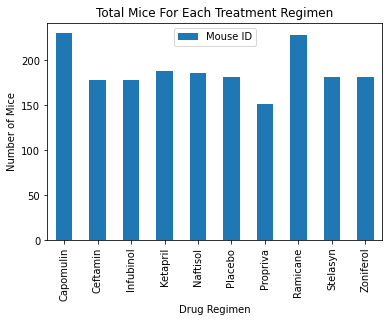

In [3]:
# Pandas Bar Plot 
totalmice = combined.groupby(['Drug Regimen']).count()  #how many are in each regimen 
totalmice = totalmice['Mouse ID'] #only look at number of mice  
totalframe = totalmice.to_frame()
plot = totalframe.plot.bar(title = 'Total Mice For Each Treatment Regimen')  
set = plot.set_ylabel("Number of Mice") 

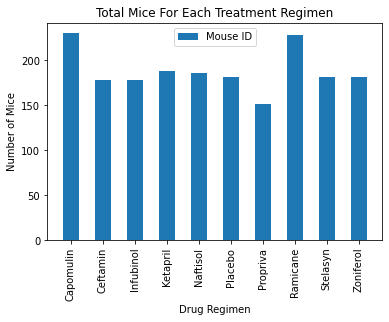

In [4]:
#Matplotlib Bar Plot 
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')  #change format to look like above 
plt.ylabel('Number of Mice') 
plt.title('Total Mice For Each Treatment Regimen') 

x =regimen_group.index # list of regimen groups 
plt.bar(x,totalmice,width= 0.5, bottom = None,align ='center') 
legend = plt.legend(totalframe)


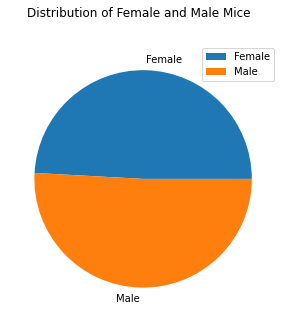

In [5]:
#Pandas Pie 
gender = combined.groupby(['Sex']).count()  #how many of each Sex 
gender = gender['Mouse ID'] #only look at one column  
genderframe = gender.to_frame() 
genderframe = genderframe.rename(columns={'Mouse ID':''})
plot = genderframe.plot.pie(title = 'Distribution of Female and Male Mice', subplots = True, figsize=(5, 5)) 

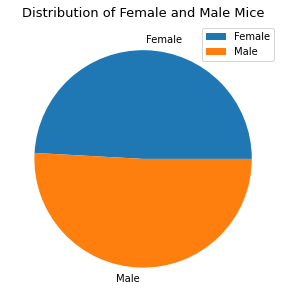

In [6]:
#add percentages!
#Matplotlib Pie 
figure(figsize=(5,5))
plt.title('Distribution of Female and Male Mice', x= .5 ,y = 1, fontsize = 13, rotation = 0) #make formatting the same as above 
plt.pie(gender, labels = ['Female', 'Male'] )  
plt.legend(labels = ['Female', 'Male']) 
plt.show()

In [7]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin 

test = combined 

indexNames = test[(test['Drug Regimen'] == 'Stelasyn')|\
                  (test['Drug Regimen'] == 'Placebo')|(test['Drug Regimen'] == 'Zoniferol')|\
                  (test['Drug Regimen'] == 'Propriva')|(test['Drug Regimen'] == 'Naftisol')|\
                  (test['Drug Regimen'] == 'Ketapril')].index
 
test.drop(indexNames , inplace=True)
#get the last time point of each mouse 
final = test.groupby(['Mouse ID'])['Timepoint'].max()  
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final = final.reset_index() 
merge =final.merge(test, on=['Mouse ID', 'Timepoint'], how = 'left')

merge 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


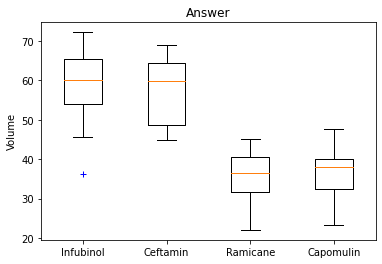

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-----------------------------------------------
The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of ceft is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-----------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of ram is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------

In [8]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
empty = [''] 

inf = merge.loc[merge['Drug Regimen'] == 'Infubinol'] 
inf = inf[['Mouse ID','Tumor Volume (mm3)']]  

ceft = merge.loc[merge['Drug Regimen'] == 'Ceftamin'] 
ceft = ceft[['Mouse ID','Tumor Volume (mm3)']]

ram = merge.loc[merge['Drug Regimen'] == 'Ramicane'] 
ram = ram[['Mouse ID','Tumor Volume (mm3)']] 

capo = merge.loc[merge['Drug Regimen'] == 'Capomulin'] 
capo = capo[['Mouse ID','Tumor Volume (mm3)']]  

inf.sort_values('Tumor Volume (mm3)')
ceft.sort_values('Tumor Volume (mm3)') 
ram.sort_values('Tumor Volume (mm3)') 
capo.sort_values('Tumor Volume (mm3)')

fig1, ax1 = plt.subplots()
ax1.set_title('Answer')
ax1.set_ylabel('Volume') 
ax1.boxplot([inf['Tumor Volume (mm3)'],ceft['Tumor Volume (mm3)'],ram['Tumor Volume (mm3)'],capo['Tumor Volume (mm3)'] ],labels = Treatments, sym = 'b+')
plt.show()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = inf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('-----------------------------------------------')  
quartiles = ceft['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of ceft is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
print('-----------------------------------------------') 

quartiles = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of ram is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print('-----------------------------------------------') 

quartiles = capo['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin  is: {iqr}")
print(f"The the median of capo is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

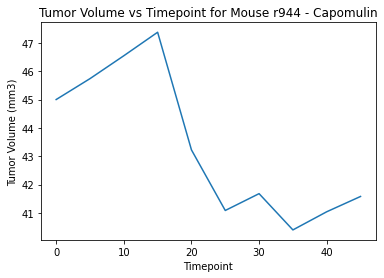

In [9]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse. 
loc= combined.loc[combined['Drug Regimen'] == 'Capomulin']  # only Capomulin Mouse 
loc = loc[['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)', 'Weight (g)']]  
new = loc.loc[loc['Mouse ID'] == 'r944']   
plt.title('Tumor Volume vs Timepoint for Mouse r944 - Capomulin') 
y = new['Tumor Volume (mm3)'] 
x = new['Timepoint'] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
Plot = plt.plot(x,y) 



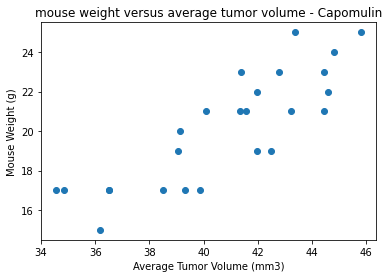

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen. 
#switch from endpoint to average tumor volume .mean( )

avg = loc.groupby(['Mouse ID']).mean() 
avgvolume = avg['Tumor Volume (mm3)'] #average tumor volume for the capo treatment 

scatter= merge.loc[merge['Drug Regimen'] == 'Capomulin'] 
scatter = scatter[['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)', 'Weight (g)']]  

x = avgvolume
y = scatter['Weight (g)']
plt.scatter (x,y)
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Average Tumor Volume (mm3)')
plt.title('mouse weight versus average tumor volume - Capomulin')
plt.show()




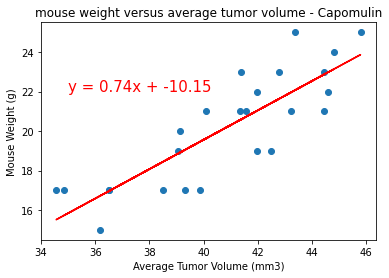

In [11]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor  
#volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(35,22), fontsize=15,color="red")
plt.ylabel('Mouse Weight (g)')
plt.xlabel('Average Tumor Volume (mm3)')
plt.title('mouse weight versus average tumor volume - Capomulin')
plt.show()

#DISPLAY THE R 